# Scaling

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14
plt.style.use("fivethirtyeight")

In [4]:
cancer_data = pd.DataFrame(load_breast_cancer().data, columns=load_breast_cancer().feature_names)

In [5]:
cancer_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
scale_test = cancer_data[cancer_data.columns[1:3]]

In [7]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

Text(0.5, 1.0, 'No Scaling')

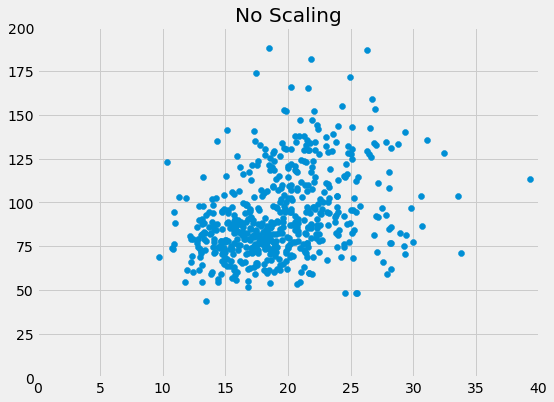

In [9]:
plt.scatter(scale_test['mean texture'], scale_test['mean perimeter'])
plt.xlim(0, 40)
plt.ylim(0, 200)
plt.title('No Scaling')

In [10]:
minmax_data = MinMaxScaler().fit_transform(scale_test)

Text(0.5, 1.0, 'MinMax Scaling')

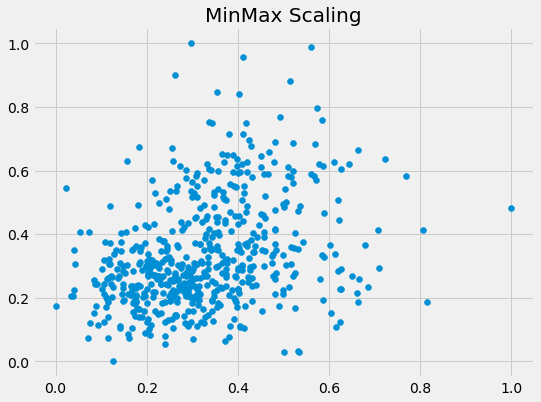

In [13]:
plt.scatter(minmax_data[:, 0], minmax_data[:, 1])
#plt.xlim(0, 40)
#plt.ylim(0, 200)
plt.title('MinMax Scaling')

In [14]:
robust_data = RobustScaler().fit_transform(scale_test)

Text(0.5, 1.0, 'Robust Scaling')

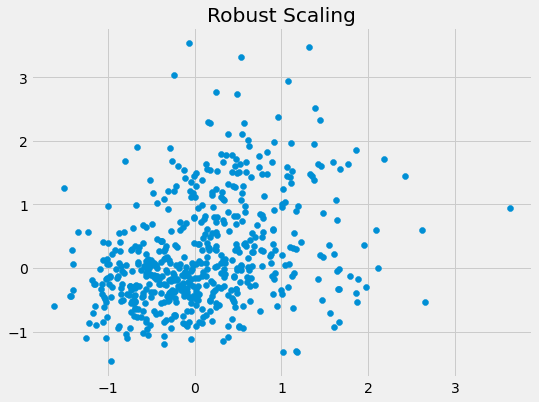

In [15]:
plt.scatter(robust_data[:, 0], robust_data[:, 1 ])
plt.title('Robust Scaling')

In [16]:
standard_data = StandardScaler().fit_transform(scale_test)

Text(0.5, 1.0, 'Standard Scaling')

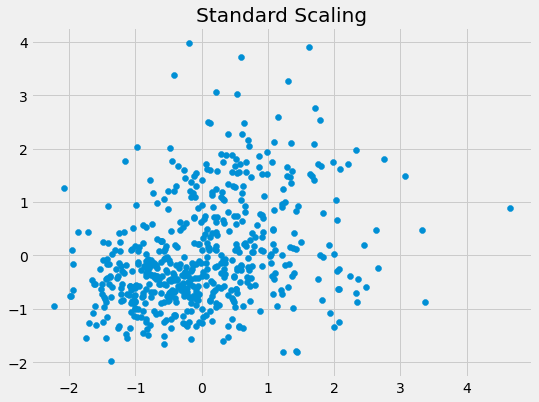

In [17]:
plt.scatter(standard_data[:, 0], standard_data[:, 1])
plt.title('Standard Scaling')

In [18]:
len(cancer_data.columns)

30

In [19]:
cancer = load_breast_cancer()

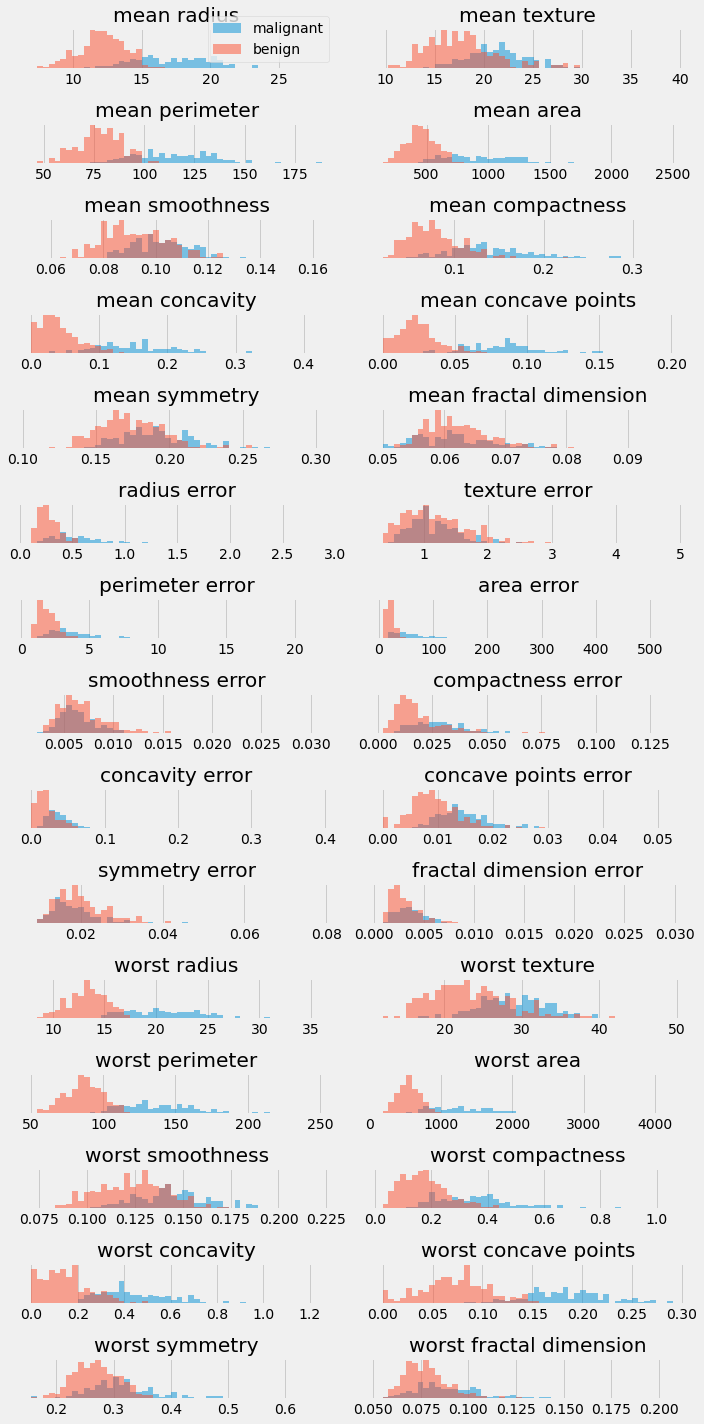

In [20]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]
ax = axes.ravel()
for i in range(len(cancer_data.columns)):
    _, bins = np.histogram(cancer.data[:, i], bins = 50)
    ax[i].hist(malignant[:, i], bins=bins, alpha=0.5)
    ax[i].hist(benign[:, i], bins=bins, alpha=0.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].legend(['malignant', 'benign'], loc='best')
fig.tight_layout()

In [21]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cancer.data)

In [22]:
from sklearn.decomposition import PCA

In [29]:
pca = PCA(n_components=2)

In [30]:
pca_data = pca.fit_transform(scaled_data)

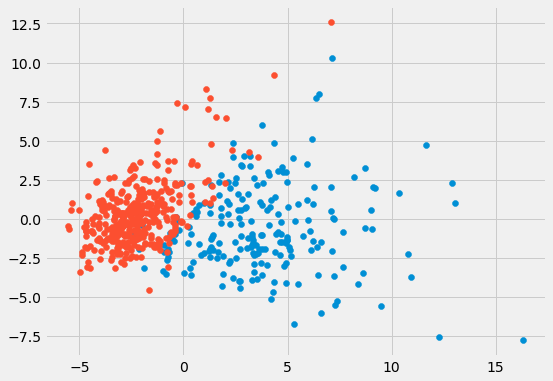

In [31]:
for i in range(2):
    data = pca_data[cancer.target == i]
    plt.scatter(data[:, 0], data[:, 1])

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [34]:
scaler = StandardScaler()
x = scaler.fit_transform(cancer.data)
X_train, X_test, y_train, y_test = train_test_split(x, cancer.target, random_state=322)

In [35]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [36]:
svc.score(X_test, y_test)

0.9790209790209791